## Análise e diagnóstico

Nesse notebook são feitas algumas análises para o diagnóstico dos dados da API do Olho Vivo

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import random
from utils.load_csv import load_csv

In [2]:
#consumo_diesel = load_csv('consumo_diesel.csv')

df_posicoes = load_csv('df_posicoes.csv')

gdf_final = load_csv('gdf_final.csv')

Ônibus que operam em mais de uma linha

In [3]:
gdf_final

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2
0,11897,917H-10,False,10.601070,"[323730.2736653163, 7401579.57348449]","[np.float64(323723.320928209), np.float64(7401...",2025-09-23 10:19:04-03:00,2025-09-23 10:19:48-03:00,Padron,0.63,0.233371,0.386269
1,11897,917H-10,False,62.279468,"[323723.320928209, 7401571.570852276]","[np.float64(323763.6651873907), np.float64(740...",2025-09-23 10:19:48-03:00,2025-09-23 10:22:45-03:00,Padron,0.63,1.371015,2.269265
2,11897,917H-10,False,0.000000,"[323763.6651873907, 7401619.016325403]","[np.float64(323763.6651873907), np.float64(740...",2025-09-23 10:22:45-03:00,2025-09-23 10:23:30-03:00,Padron,0.63,0.000000,0.000000
3,11897,917H-10,False,0.000000,"[323763.6651873907, 7401619.016325403]","[np.float64(323763.6651873907), np.float64(740...",2025-09-23 10:23:30-03:00,2025-09-23 10:24:14-03:00,Padron,0.63,0.000000,0.000000
4,11897,917H-10,False,51.679120,"[323763.6651873907, 7401619.016325403]","[np.float64(323730.2736653163), np.float64(740...",2025-09-23 10:24:14-03:00,2025-09-23 10:24:58-03:00,Padron,0.63,1.137660,1.883022
...,...,...,...,...,...,...,...,...,...,...,...,...
64029,41902,2100-10,False,0.000000,"[344592.67972426594, 7393802.241556752]","[np.float64(344592.67972426594), np.float64(73...",2025-09-23 10:25:13-03:00,2025-09-23 10:25:59-03:00,Básico,0.53,0.000000,0.000000
64030,78239,6015-10,False,95.550654,"[318307.70927837724, 7376505.62344569]","[np.float64(318263.28114526544), np.float64(73...",2025-09-23 10:25:06-03:00,2025-09-23 10:25:54-03:00,Básico,0.53,2.234803,3.399942
64031,26020,172Y-10,False,0.000000,"[338593.0688982782, 7403092.542504535]","[np.float64(338593.0688982782), np.float64(740...",2025-09-23 10:25:09-03:00,2025-09-23 10:26:01-03:00,Articulado (23m),0.85,0.000000,0.000000
64032,25623,2013-10,True,0.000000,"[329651.4083395654, 7404010.2575707715]","[np.float64(329651.4083395654), np.float64(740...",2025-09-23 10:25:20-03:00,2025-09-23 10:25:20-03:00,Midiônibus,0.47,0.000000,0.000000


In [4]:
gdf_final['id_2'] = gdf_final['linha'] + '_' + gdf_final['id_onibus'].astype(str)

gdf_final.head()

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,id_2
0,11897,917H-10,False,10.601070,"[323730.2736653163, 7401579.57348449]","[np.float64(323723.320928209), np.float64(7401...",2025-09-23 10:19:04-03:00,2025-09-23 10:19:48-03:00,Padron,0.63,0.233371,0.386269,917H-10_11897
1,11897,917H-10,False,62.279468,"[323723.320928209, 7401571.570852276]","[np.float64(323763.6651873907), np.float64(740...",2025-09-23 10:19:48-03:00,2025-09-23 10:22:45-03:00,Padron,0.63,1.371015,2.269265,917H-10_11897
2,11897,917H-10,False,0.000000,"[323763.6651873907, 7401619.016325403]","[np.float64(323763.6651873907), np.float64(740...",2025-09-23 10:22:45-03:00,2025-09-23 10:23:30-03:00,Padron,0.63,0.000000,0.000000,917H-10_11897
3,11897,917H-10,False,0.000000,"[323763.6651873907, 7401619.016325403]","[np.float64(323763.6651873907), np.float64(740...",2025-09-23 10:23:30-03:00,2025-09-23 10:24:14-03:00,Padron,0.63,0.000000,0.000000,917H-10_11897
4,11897,917H-10,False,51.679120,"[323763.6651873907, 7401619.016325403]","[np.float64(323730.2736653163), np.float64(740...",2025-09-23 10:24:14-03:00,2025-09-23 10:24:58-03:00,Padron,0.63,1.137660,1.883022,917H-10_11897


In [5]:
gdf_final['id_onibus'].nunique()

10737

In [6]:
gdf_final['id_2'].nunique()

10798

In [7]:
df = gdf_final.groupby('id_onibus')['linha'].nunique() > 1

ids_multilinhas = gdf_final[gdf_final['id_onibus'].isin(df[df].index)]

ids_multilinhas[['id_onibus', 'linha']].drop_duplicates().sort_values('id_onibus')

,id_onibus,linha
35303,3117,573H-10
35304,3117,4027-41
35843,10230,8548-10
35842,10230,8006-10
84,11823,917H-10
...,...,...
15822,90999,3738-10
15820,90999,372F-10
15821,90999,514T-10
15825,90999,3053-10


In [8]:
counts = gdf_final.groupby('id_onibus')['linha'].nunique()

ids_multilinhas = counts[counts > 1].index

ids_multilinhas

Index([ 3117, 10230, 11823, 16099, 16139, 16727, 21101, 21265, 21707, 22009,
       22285, 22538, 22664, 22745, 31150, 31284, 31660, 31784, 31854, 32017,
       32243, 32652, 32664, 32948, 35759, 35930, 36189, 36217, 36604, 36612,
       48975, 51074, 51092, 51582, 52767, 61240, 61277, 61279, 61788, 63366,
       66104, 68068, 68072, 68087, 68275, 68281, 68854, 73354, 73415, 73925,
       73965, 78166, 81378, 82575, 86104, 86121, 90999],
      dtype='int64', name='id_onibus')

Ônibus duplicados

In [9]:
#duplicados = (df_posicoes.groupby(["id_onibus", "timestamp"]).filter(lambda x: len(x) > 1).sort_values(["id_onibus", "timestamp"]))

#duplicados

Horas e datas das posições

In [10]:
df_posicoes['timestamp'] = pd.to_datetime(df_posicoes['timestamp'])

In [11]:
horas = df_posicoes["timestamp"].dt.hour

horas_unicas = horas.unique()
horas_unicas.sort()

print(horas_unicas)

[ 7  8  9 10]


In [12]:
dez_horas = df_posicoes[df_posicoes["timestamp"].dt.hour == 10]

dez_horas

,linha,id_onibus,timestamp,lat,lon,is_eletrico,modelo
0,917H-10,11897,2025-09-23 10:19:04-03:00,-23.486367,-46.726082,False,Padron
1,917H-10,11886,2025-09-23 10:18:57-03:00,-23.589215,-46.634663,False,Articulado (18m)
2,917H-10,11882,2025-09-23 10:18:59-03:00,-23.589249,-46.633758,True,Básico
3,917H-10,11718,2025-09-23 10:19:04-03:00,-23.535546,-46.726671,True,Articulado (23m)
4,917H-10,11903,2025-09-23 10:19:36-03:00,-23.486014,-46.725750,False,Articulado (18m)
...,...,...,...,...,...,...,...
74789,6813-10,72019,2025-09-23 10:25:40-03:00,-23.662937,-46.762801,True,Básico
74790,4008-21,48243,2025-09-23 10:26:04-03:00,-23.579354,-46.432372,True,Articulado (18m)
74791,4086-10,47390,2025-09-23 10:25:43-03:00,-23.583050,-46.407673,True,Articulado (18m)
74792,3010-10,36189,2025-09-23 10:25:47-03:00,-23.513862,-46.447780,False,Midiônibus


In [13]:
datas = df_posicoes["timestamp"].dt.date

datas_unicas = datas.unique()
datas_unicas.sort()

print(datas_unicas)

[datetime.date(2025, 9, 23)]


Distâncias e velocidades impossíveis

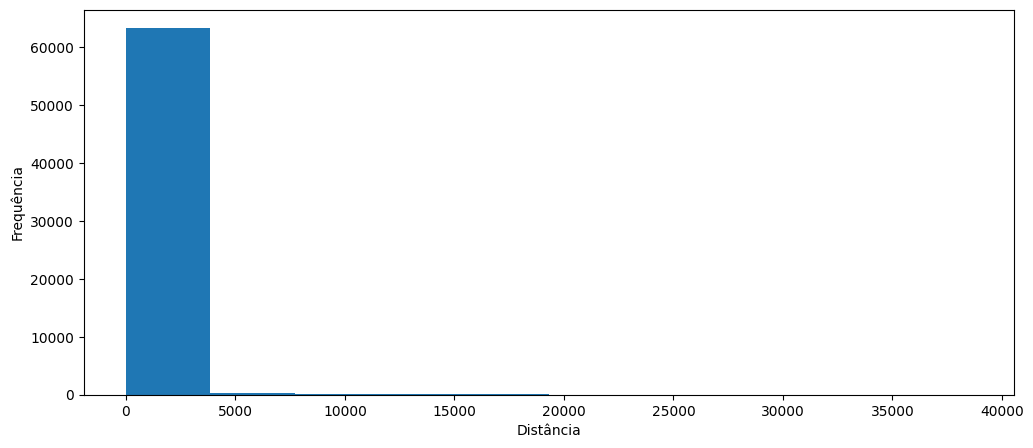

In [14]:
plt.figure(figsize=(12,5))
plt.hist(gdf_final["distancia_percorrida"])
plt.xlabel("Distância")
plt.ylabel("Frequência")
plt.show()

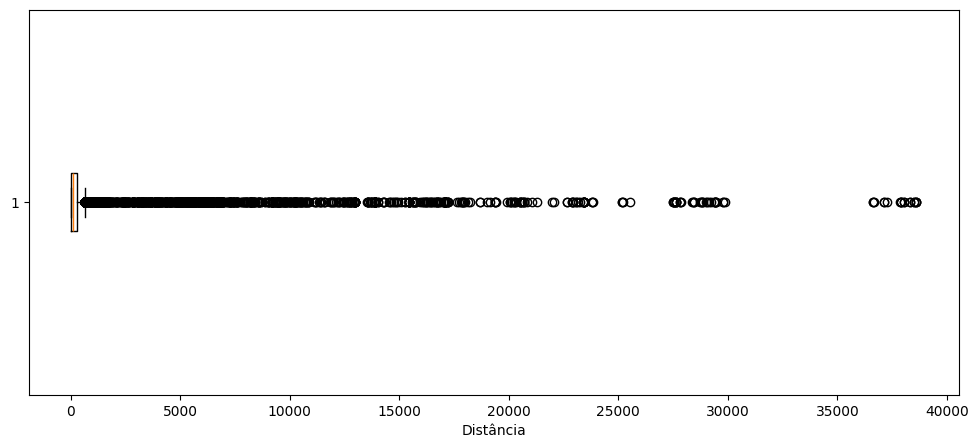

In [15]:
plt.figure(figsize=(12,5))
plt.boxplot(gdf_final["distancia_percorrida"], vert=False)
plt.xlabel("Distância")
plt.show()

In [16]:
gdf_final[gdf_final['distancia_percorrida'] >= 25000]

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,id_2
193,66104,507T-10,False,28450.744835,"[342474.3825173754, 7395186.5233142115]","[np.float64(328576.82118495076), np.float64(73...",2025-09-23 10:19:21-03:00,2025-09-23 10:19:23-03:00,Básico,0.53,665.425029,1012.351894,507T-10_66104
194,66104,6058-10,False,28467.979329,"[328576.82118495076, 7370361.07929655]","[np.float64(342682.89451042295), np.float64(73...",2025-09-23 10:19:23-03:00,2025-09-23 10:20:06-03:00,Básico,0.53,665.828121,1012.965142,6058-10_66104
195,66104,507T-10,False,28354.660911,"[342682.89451042295, 7395088.483980982]","[np.float64(328466.0586024276), np.float64(737...",2025-09-23 10:20:06-03:00,2025-09-23 10:20:08-03:00,Básico,0.53,663.177754,1008.932977,507T-10_66104
196,66104,6058-10,False,28399.120890,"[328466.0586024276, 7370555.478209766]","[np.float64(343122.8476676706), np.float64(739...",2025-09-23 10:20:08-03:00,2025-09-23 10:22:21-03:00,Básico,0.53,664.217614,1010.514979,6058-10_66104
197,66104,507T-10,False,28831.486659,"[343122.8476676706, 7394880.12829246]","[np.float64(327747.1478551749), np.float64(737...",2025-09-23 10:22:21-03:00,2025-09-23 10:22:23-03:00,Básico,0.53,674.330074,1025.899684,507T-10_66104
198,66104,6058-10,False,28853.954500,"[327747.1478551749, 7370490.735552215]","[np.float64(343286.4467204367), np.float64(739...",2025-09-23 10:22:23-03:00,2025-09-23 10:23:06-03:00,Básico,0.53,674.855566,1026.699148,6058-10_66104
199,66104,507T-10,False,28743.387693,"[343286.4467204367, 7394802.890558469]","[np.float64(327510.00632596493), np.float64(73...",2025-09-23 10:23:06-03:00,2025-09-23 10:23:08-03:00,Básico,0.53,672.269556,1022.764892,507T-10_66104
201,66104,6058-10,False,28791.098350,"[327229.00792183477, 7370994.167001219]","[np.float64(343706.6416908258), np.float64(739...",2025-09-23 10:24:08-03:00,2025-09-23 10:24:36-03:00,Básico,0.53,673.385445,1024.462562,6058-10_66104
202,66104,507T-10,False,29021.394209,"[343706.6416908258, 7394603.803371844]","[np.float64(327109.21061959356), np.float64(73...",2025-09-23 10:24:36-03:00,2025-09-23 10:24:53-03:00,Básico,0.53,678.771758,1032.657091,507T-10_66104
203,66104,6058-10,False,29061.239140,"[327109.21061959356, 7370796.942938581]","[np.float64(343914.63268830907), np.float64(73...",2025-09-23 10:24:53-03:00,2025-09-23 10:25:21-03:00,Básico,0.53,679.703678,1034.074878,6058-10_66104


In [17]:
gdf_final['momento_inicial'] = pd.to_datetime(gdf_final['momento_inicial'])
gdf_final['momento_final'] = pd.to_datetime(gdf_final['momento_final'])

In [18]:
gdf_final['duracao'] = (gdf_final['momento_final'] - gdf_final['momento_inicial']).dt.total_seconds()

gdf_final.head()

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,id_2,duracao
0,11897,917H-10,False,10.601070,"[323730.2736653163, 7401579.57348449]","[np.float64(323723.320928209), np.float64(7401...",2025-09-23 10:19:04-03:00,2025-09-23 10:19:48-03:00,Padron,0.63,0.233371,0.386269,917H-10_11897,44.0
1,11897,917H-10,False,62.279468,"[323723.320928209, 7401571.570852276]","[np.float64(323763.6651873907), np.float64(740...",2025-09-23 10:19:48-03:00,2025-09-23 10:22:45-03:00,Padron,0.63,1.371015,2.269265,917H-10_11897,177.0
2,11897,917H-10,False,0.000000,"[323763.6651873907, 7401619.016325403]","[np.float64(323763.6651873907), np.float64(740...",2025-09-23 10:22:45-03:00,2025-09-23 10:23:30-03:00,Padron,0.63,0.000000,0.000000,917H-10_11897,45.0
3,11897,917H-10,False,0.000000,"[323763.6651873907, 7401619.016325403]","[np.float64(323763.6651873907), np.float64(740...",2025-09-23 10:23:30-03:00,2025-09-23 10:24:14-03:00,Padron,0.63,0.000000,0.000000,917H-10_11897,44.0
4,11897,917H-10,False,51.679120,"[323763.6651873907, 7401619.016325403]","[np.float64(323730.2736653163), np.float64(740...",2025-09-23 10:24:14-03:00,2025-09-23 10:24:58-03:00,Padron,0.63,1.137660,1.883022,917H-10_11897,44.0


In [19]:
gdf_final["velocidade"] = (gdf_final["distancia_percorrida"] / gdf_final["duracao"]) * 3.6

gdf_final.head()

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,id_2,duracao,velocidade
0,11897,917H-10,False,10.601070,"[323730.2736653163, 7401579.57348449]","[np.float64(323723.320928209), np.float64(7401...",2025-09-23 10:19:04-03:00,2025-09-23 10:19:48-03:00,Padron,0.63,0.233371,0.386269,917H-10_11897,44.0,0.867360
1,11897,917H-10,False,62.279468,"[323723.320928209, 7401571.570852276]","[np.float64(323763.6651873907), np.float64(740...",2025-09-23 10:19:48-03:00,2025-09-23 10:22:45-03:00,Padron,0.63,1.371015,2.269265,917H-10_11897,177.0,1.266701
2,11897,917H-10,False,0.000000,"[323763.6651873907, 7401619.016325403]","[np.float64(323763.6651873907), np.float64(740...",2025-09-23 10:22:45-03:00,2025-09-23 10:23:30-03:00,Padron,0.63,0.000000,0.000000,917H-10_11897,45.0,0.000000
3,11897,917H-10,False,0.000000,"[323763.6651873907, 7401619.016325403]","[np.float64(323763.6651873907), np.float64(740...",2025-09-23 10:23:30-03:00,2025-09-23 10:24:14-03:00,Padron,0.63,0.000000,0.000000,917H-10_11897,44.0,0.000000
4,11897,917H-10,False,51.679120,"[323763.6651873907, 7401619.016325403]","[np.float64(323730.2736653163), np.float64(740...",2025-09-23 10:24:14-03:00,2025-09-23 10:24:58-03:00,Padron,0.63,1.137660,1.883022,917H-10_11897,44.0,4.228292


In [20]:
gdf_final['velocidade'].describe()

count    61763.000000
mean        54.937381
std       1030.348819
min          0.000000
25%          0.000000
50%          7.112071
75%         16.426306
max      69492.425013
Name: velocidade, dtype: float64

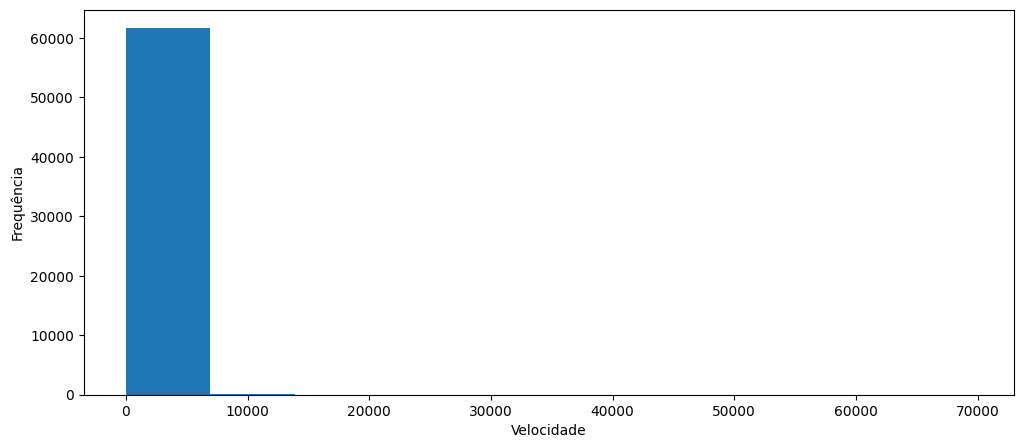

In [21]:
plt.figure(figsize=(12,5))
plt.hist(gdf_final["velocidade"])
plt.xlabel("Velocidade")
plt.ylabel("Frequência")
plt.show()

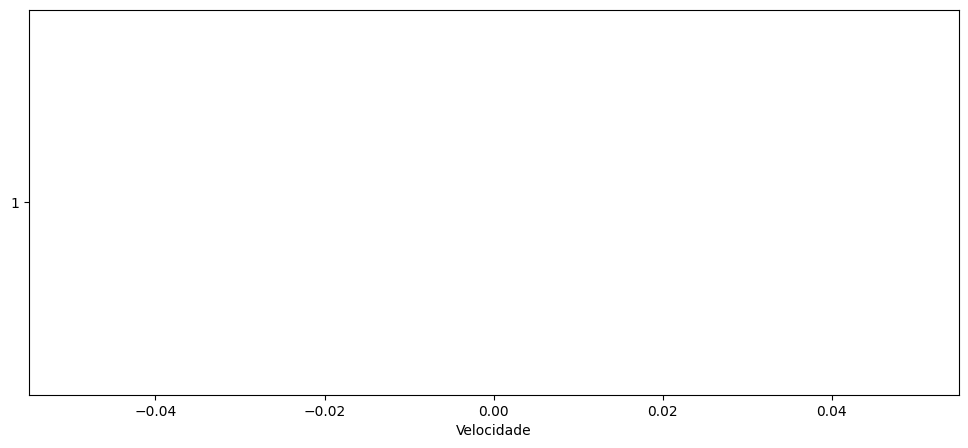

In [22]:
plt.figure(figsize=(12,5))
plt.boxplot(gdf_final["velocidade"], vert=False)
plt.xlabel("Velocidade")
plt.show()

In [23]:
gdf_final[(gdf_final['velocidade'] >= 0) & (gdf_final['velocidade'] <= 50)]

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,id_2,duracao,velocidade
0,11897,917H-10,False,10.601070,"[323730.2736653163, 7401579.57348449]","[np.float64(323723.320928209), np.float64(7401...",2025-09-23 10:19:04-03:00,2025-09-23 10:19:48-03:00,Padron,0.63,0.233371,0.386269,917H-10_11897,44.0,0.867360
1,11897,917H-10,False,62.279468,"[323723.320928209, 7401571.570852276]","[np.float64(323763.6651873907), np.float64(740...",2025-09-23 10:19:48-03:00,2025-09-23 10:22:45-03:00,Padron,0.63,1.371015,2.269265,917H-10_11897,177.0,1.266701
2,11897,917H-10,False,0.000000,"[323763.6651873907, 7401619.016325403]","[np.float64(323763.6651873907), np.float64(740...",2025-09-23 10:22:45-03:00,2025-09-23 10:23:30-03:00,Padron,0.63,0.000000,0.000000,917H-10_11897,45.0,0.000000
3,11897,917H-10,False,0.000000,"[323763.6651873907, 7401619.016325403]","[np.float64(323763.6651873907), np.float64(740...",2025-09-23 10:23:30-03:00,2025-09-23 10:24:14-03:00,Padron,0.63,0.000000,0.000000,917H-10_11897,44.0,0.000000
4,11897,917H-10,False,51.679120,"[323763.6651873907, 7401619.016325403]","[np.float64(323730.2736653163), np.float64(740...",2025-09-23 10:24:14-03:00,2025-09-23 10:24:58-03:00,Padron,0.63,1.137660,1.883022,917H-10_11897,44.0,4.228292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64028,36559,3795-10,True,104.740232,"[349791.19396368647, 7395597.059673949]","[np.float64(349894.39702548203), np.float64(73...",2025-09-23 10:25:11-03:00,2025-09-23 10:25:46-03:00,Articulado (18m),0.80,2.712919,7.918528,3795-10_36559,35.0,10.773281
64029,41902,2100-10,False,0.000000,"[344592.67972426594, 7393802.241556752]","[np.float64(344592.67972426594), np.float64(73...",2025-09-23 10:25:13-03:00,2025-09-23 10:25:59-03:00,Básico,0.53,0.000000,0.000000,2100-10_41902,46.0,0.000000
64030,78239,6015-10,False,95.550654,"[318307.70927837724, 7376505.62344569]","[np.float64(318263.28114526544), np.float64(73...",2025-09-23 10:25:06-03:00,2025-09-23 10:25:54-03:00,Básico,0.53,2.234803,3.399942,6015-10_78239,48.0,7.166299
64031,26020,172Y-10,False,0.000000,"[338593.0688982782, 7403092.542504535]","[np.float64(338593.0688982782), np.float64(740...",2025-09-23 10:25:09-03:00,2025-09-23 10:26:01-03:00,Articulado (23m),0.85,0.000000,0.000000,172Y-10_26020,52.0,0.000000


In [24]:
gdf_final[gdf_final['velocidade'] > 50]

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,id_2,duracao,velocidade
84,11823,917H-10,True,5939.832594,"[333241.62948815303, 7390290.851753244]","[np.float64(327362.43835212395), np.float64(73...",2025-09-23 10:19:15-03:00,2025-09-23 10:19:25-03:00,Básico,0.53,138.924773,211.354775,917H-10_11823,10.0,2138.339734
85,11823,958P-10,True,5939.832594,"[327362.43835212395, 7389444.2569077015]","[np.float64(333241.62948815303), np.float64(73...",2025-09-23 10:19:25-03:00,2025-09-23 10:20:00-03:00,Básico,0.53,138.924773,211.354775,958P-10_11823,35.0,610.954210
86,11823,917H-10,True,5879.069787,"[333241.62948815303, 7390290.851753244]","[np.float64(327421.16477082996), np.float64(73...",2025-09-23 10:20:00-03:00,2025-09-23 10:20:10-03:00,Básico,0.53,137.503612,209.192676,917H-10_11823,10.0,2116.465123
87,11823,958P-10,True,5852.192989,"[327421.16477082996, 7389462.81067059]","[np.float64(333213.97872033465), np.float64(73...",2025-09-23 10:20:10-03:00,2025-09-23 10:22:12-03:00,Básico,0.53,136.875000,208.236329,958P-10_11823,122.0,172.687662
88,11823,917H-10,True,5852.192989,"[333213.97872033465, 7390294.3570184745]","[np.float64(327421.16477082996), np.float64(73...",2025-09-23 10:22:12-03:00,2025-09-23 10:22:23-03:00,Básico,0.53,136.875000,208.236329,917H-10_11823,11.0,1915.263160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63771,48292,407P-10,False,17829.908833,"[356305.7598239029, 7391225.664613983]","[np.float64(339039.9375834544), np.float64(739...",2025-09-23 10:22:40-03:00,2025-09-23 10:23:25-03:00,Midiônibus,0.47,251.720189,544.669583,407P-10_48292,45.0,1426.392707
63772,48292,407P-10,False,17863.316891,"[339039.9375834544, 7395675.050116828]","[np.float64(356337.8006178117), np.float64(739...",2025-09-23 10:23:25-03:00,2025-09-23 10:24:10-03:00,Midiônibus,0.47,252.191839,545.690135,407P-10_48292,45.0,1429.065351
63837,31063,2626-10,False,22639.054961,"[333568.57942367624, 7395002.737628453]","[np.float64(356018.0723731544), np.float64(739...",2025-09-23 10:22:13-03:00,2025-09-23 10:23:26-03:00,Miniônibus,0.35,180.629747,542.273716,2626-10_31063,73.0,1116.446546
63980,21818,106A-10,False,11824.690528,"[334157.0299277988, 7399958.695189435]","[np.float64(327690.8993049264), np.float64(739...",2025-09-23 10:15:58-03:00,2025-09-23 10:24:05-03:00,Básico,0.53,276.563763,420.753408,106A-10_21818,487.0,87.410443


In [25]:
gdf_final[gdf_final['velocidade'] < 0]

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,id_2,duracao,velocidade
